# Audio Effects Classification using Support-vector Machine

In [96]:
import numpy as np
import librosa
import os
import sklearn.svm
import sklearn.preprocessing as scale

from tqdm.notebook import tqdm
from IPython.display import Audio

# Load Files and Create Lables

In [80]:
root = 'IDMT-SMT-AUDIO-EFFECTS/Gitarre monophon/Samples'
root = r'C:\Users\Luca Gobbato\Desktop\guitar'
classes = []
fileList = []
fileLable = []
number_file = []

sub_dirs = [x[0] for x in os.walk(root)]

for sub_dir in sub_dirs[1:]:
    className = os.path.basename(sub_dir) # return the last term of path
    classes.append(className)
    
    prog_bar = tqdm(desc='Loading audio samples')
    prog_bar.reset(total=len(os.listdir(sub_dir))) 
    
    file_list = [f for f in os.listdir(sub_dir) if f.endswith('.wav')]
    
    for f in file_list:
        fileList.append(os.path.join(sub_dir,f))
        fileLable.append(className)
        prog_bar.update()
    prog_bar.refresh();
    
    number_file.append(len(os.listdir(sub_dir)))

print(number_file)    
print(classes)
len(fileList)

Loading audio samples: 0it [00:00, ?it/s]

Loading audio samples: 0it [00:00, ?it/s]

Loading audio samples: 0it [00:00, ?it/s]

[1872, 624, 1872]
['Distortion', 'NoFX', 'Tremolo']


4368

# Compute Features

In [85]:
n_mfcc = 40 # 13
samples = len(fileList)
mfcc_ft = np.zeros((samples, n_mfcc))
zcr_ft = np.zeros((samples,173))
sc_ft = np.zeros((samples,173))

prog_bar = tqdm(desc='Loading audio samples')
prog_bar.reset(total=samples) 

for index, f in enumerate(fileList): 
    audio, fs = librosa.load(f, sr=None)
    
    mfcc = librosa.feature.mfcc(y=audio,sr=fs,n_fft=2048,hop_length=512,window='hamming',n_mels=40,fmin=80,fmax=8000,
                                n_mfcc=n_mfcc,norm='ortho')
    mfcc_ft[index, :] = np.mean(mfcc, axis=1) 
    
    zcr = librosa.feature.zero_crossing_rate(y=audio, frame_length=2048, hop_length=512, center=True)
    zcr_ft[index, :] = zcr
    
    sc = librosa.feature.spectral_centroid(y=audio, sr=fs, n_fft=2048, hop_length=512, freq=None)
    sc_ft[index, :] = sc
    
    prog_bar.update()
prog_bar.refresh();

features = np.concatenate((mfcc_ft,zcr_ft,sc_ft), axis=1)
# print(spectral_ft.shape)
# print(spectral_ft)
print(features.shape)
print(features)

Loading audio samples: 0it [00:00, ?it/s]

(4368, 386)
[[-1.59179520e+02  7.75590134e+01 -9.65071774e+00 ...  7.43312820e+02
   7.98321893e+02  9.17105007e+02]
 [-1.26484634e+02  6.13557243e+01  5.89820337e+00 ...  1.40749636e+03
   1.42656645e+03  1.47902489e+03]
 [-2.14657928e+02  9.29478226e+01  1.10357656e+01 ...  5.35829581e+02
   6.31460676e+02  8.48407121e+02]
 ...
 [-3.07947937e+02  2.53765774e+01 -6.92750168e+00 ...  3.91026670e+03
   4.85405399e+03  5.61210797e+03]
 [-3.18150970e+02  2.44234123e+01 -6.58422899e+00 ...  4.29383067e+03
   5.32854598e+03  5.73459193e+03]
 [-3.12455200e+02  2.42668915e+01 -6.77647877e+00 ...  5.70151351e+03
   6.88113195e+03  6.30526241e+03]]


In [86]:
print(features.shape)
print(mfcc_ft.shape)
print(zcr_ft.shape)
print(sc_ft.shape)

(4368, 386)
(4368, 40)
(4368, 173)
(4368, 173)


### Normalize the Features

In [87]:
feat_max = np.max(features)
feat_min = np.min(features)
feat_normalized = (features - feat_min) / (feat_max - feat_min)

(-0.5, 385.5, 4367.5, -0.5)

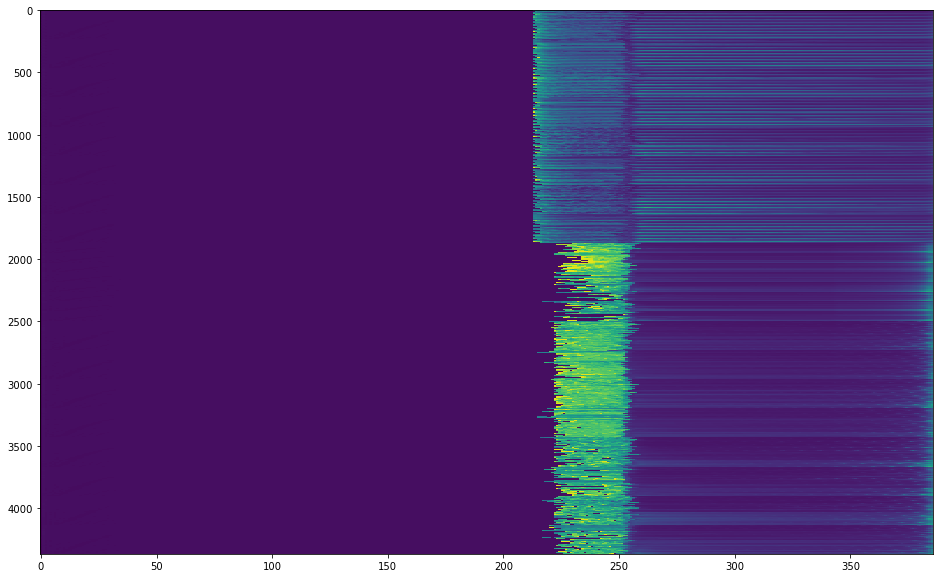

In [88]:
plt.figure(figsize=(16, 10))
plt.imshow(feat_normalized,interpolation='none')
plt.axis('auto')

## Other possible feature joining

Text(0.5, 1.0, 'sc')

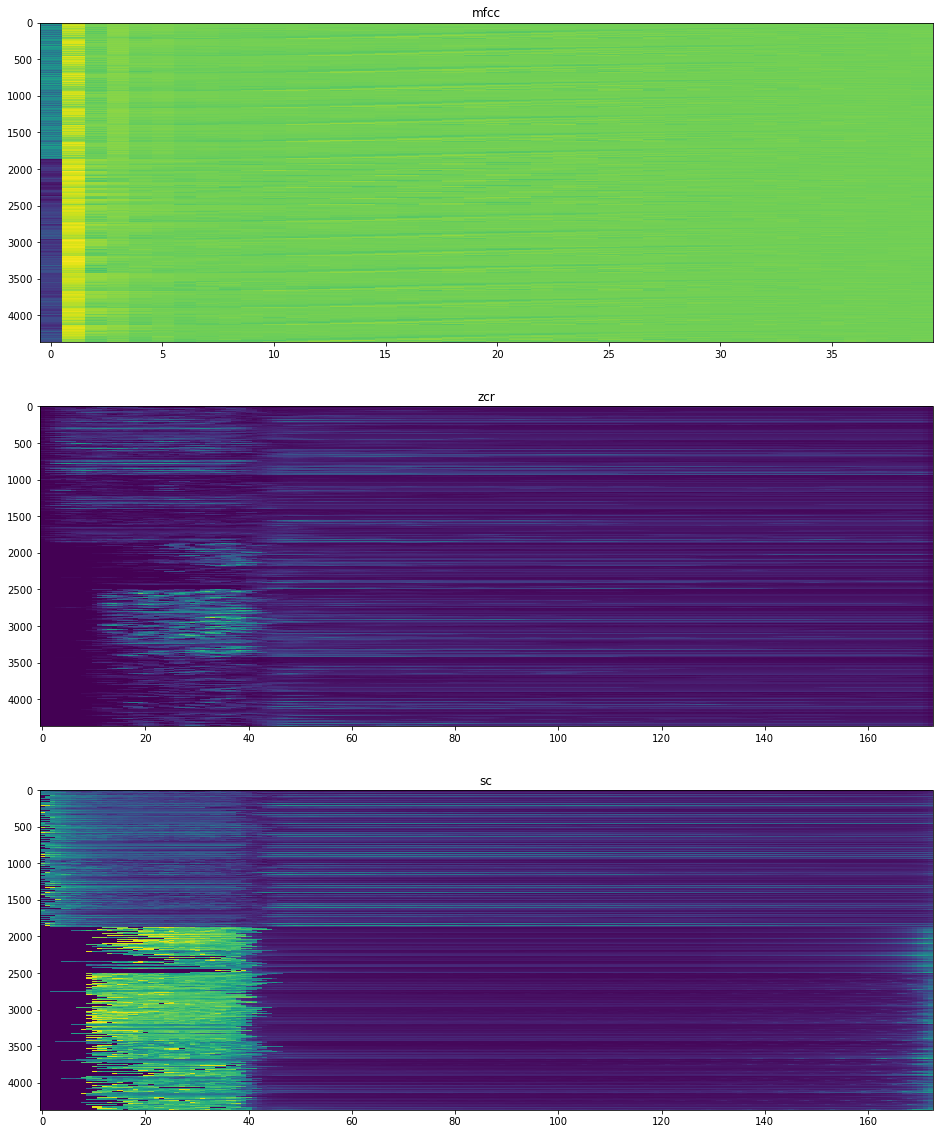

In [90]:
plt.figure(figsize=(16, 20))
plt.subplot(3,1,1)
plt.imshow(mfcc_ft,interpolation='none')
plt.axis('auto');
plt.title('mfcc')

plt.subplot(3,1,2)
plt.imshow(zcr_ft,interpolation='none')
plt.axis('auto');
plt.title('zcr')

plt.subplot(3,1,3)
plt.imshow(sc_ft,interpolation='none')
plt.axis('auto');
plt.title('sc')

(-0.5, 41.5, 4367.5, -0.5)

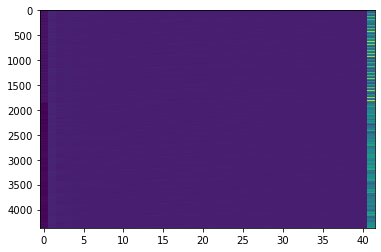

In [93]:
added_features = np.column_stack((np.mean(zcr_ft, axis=1),np.mean(sc_ft, axis=1)))
features_alt = np.concatenate((mfcc_ft,added_features), axis=1)
plt.imshow(features_alt,interpolation='none')
plt.axis('auto')

(-0.5, 41.5, 4367.5, -0.5)

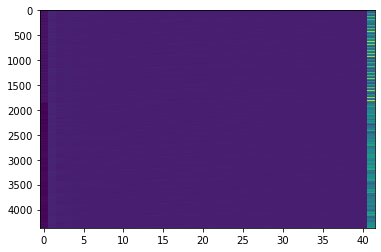

In [94]:
# zcr_ft_norm = np.mean(zcr_ft, axis=1);
# zcr_ft_norm = zcr_ft_norm/np.max(zcr_ft_norm);
# sc_ft_norm = np.mean(sc_ft, axis=1);
# sc_ft_norm = sc_ft_norm / np.max(sc_ft_norm);
# mfcc_ft_norm = mfcc_ft

zcr_ft_norm = scale.minmax_scale(np.mean(zcr_ft, axis=1))
sc_ft_norm = scale.minmax_scale(np.mean(sc_ft, axis=1))
mfcc_ft_norm = scale.minmax_scale(np.mean(zcr_ft, axis=1))


added_features = np.column_stack(zcr_ft_norm,sc_ft_norm)
features_alt = np.concatenate((mfcc_ft,added_features), axis=1)
plt.imshow(features_alt,interpolation='none')
plt.axis('auto')

# Split Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feat_normalized, fileLable, test_size = 0.2)
#X_train_SpectralFt,X_test_SpectralFt,y_train_SpectralFt,y_test_SpectralFt = train_test_split(spectral_feat_normalized, fileLable, test_size = 0.2)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features_alt, fileLable, test_size = 0.2)
#X_train_SpectralFt,X_test_SpectralFt,y_train_SpectralFt,y_test_SpectralFt = train_test_split(spectral_feat_normalized, fileLable, test_size = 0.2)

In [9]:
print(X_train.shape, X_test.shape)
#print(X_train_SpectralFt, X_test_SpectralFt)

(7488, 386) (1872, 386)


In [ ]:
##GMM
#gmm_0 = 

# SVM: multiclass case

## Define and train a model

In [13]:
SVM_parameters={
    'C': 2,
    'kernel': 'rbf',
}

ss = sklearn.svm.SVC(**SVM_parameters, probability=True)
ss.fit(X_train, y_train)
accuracy = ss.score(X_test, y_test)
print("The accuracy is",format(accuracy))

The accuracy is 0.6057692307692307


## Evaluate and Output the Confusion Matrix

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(ss, X_test, y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

NameError: name 'ss' is not defined